### Task1 Change Car Plate to another one(30%)
* 把照片中斜的車牌換成另一張車牌，樣式必須和原本一樣(斜度、大小)

### Task2 Rotated Car Plate (60%)
* 請將斜車牌底下的圖片，針對車牌位置進行四點手動標註，並套用1.的方法轉正

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

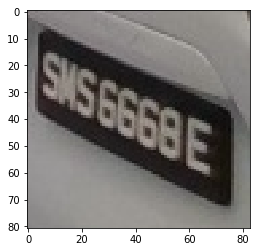

In [2]:
# Read ROI Car plate
ROI_plate = cv2.imread('plate_data/ROI/ROI-002.jpg')
plt.subplot()
plt.imshow(ROI_plate)

In [3]:
# Get picture H/W
img_height,img_width = ROI_plate.shape[:2]
print('H/W :',img_height,img_width)

H/W : 81 83


In [4]:
# Manaul get car plate x/y point 
points1 = np.float32([[3,7], [75,35], [3,37], [75,70]])
points2 = np.float32([[0,0], [72,0], [0,30], [72,30]])

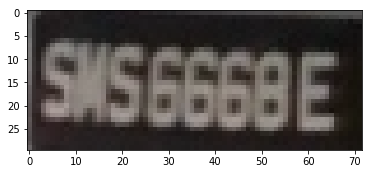

In [5]:
# Get Transfer Matrix
M = cv2.getPerspectiveTransform(points1, points2)
# Transfer Car Plate
transfer_car_plate = cv2.warpPerspective(ROI_plate,M,(72, 30))
plt.imshow(transfer_car_plate)

(724, 926, 3)


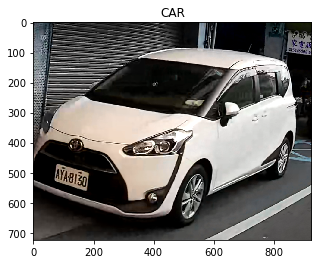

In [6]:
# Read Car
car = cv2.imread('plate_data/32.png')
print(car.shape)
h , w  , _ = car.shape
plt.title('CAR')
plt.imshow(car)

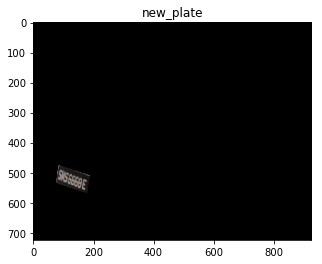

In [7]:
# Cal. transfer_car_plate and Car plate Rotate angle:M2
points3 = np.float32([[85,475],[190,510],[75,535], [180,570]])
M2 = cv2.getPerspectiveTransform(points2, points3) # let transfer_car_plate to Car plate angle

# Use Another Car plate as new car plate
new_plate = cv2.warpPerspective(transfer_car_plate,M2,(926,724)) #(another_plate,Rotate_angle,Image_size)
plt.title('new_plate')
plt.imshow(new_plate)

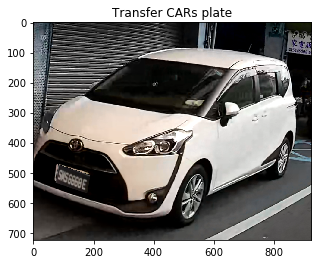

In [8]:
for i in range(0,h):
    for j in range(0,w):
        if new_plate[i][j].sum()!=0: # if Not background (Car plate pixel)
            car[i][j]=new_plate[i][j]
plt.title('Transfer CARs plate')
plt.imshow(car)

### Task3 recognition Car Plate

In [ ]:
# in progress..